<a href="https://colab.research.google.com/github/HakbilenBerk/ML_learning_content/blob/main/1_linear_regression_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Regression?

In statistical modeling, regression analysis estimates the relationship between one or more independent variables and the dependent variable which represents the outcome.

To explain with an example you can imagine a list of houses, with information regarding to the size, distance to city center, garden (independent variables). Using these information, you can try to understand how the price(dependent variables) changes.

So for a regression analysis we have a set of observations or samples with one or more variables/features. Then, we define a dependent variable (the outcome) and try to find a relation between the dependent variables and the independent variables. The best way to do this is by finding a function which best represent the data. 


# Linear Models for Regression

## Linear Regression

In the linear regression model, we will use regression analysis to best represent the dataset through a linear function. Then, we will use this function to predict the outcome of a new sample/observation which was not in the dataset.

Linear regression is one of the most used regression models due to its simplicity and ease of understanding the results. Let's move on to the model formulations to understand this better.


---


The linear regression function is written assuming a linear relationship between the variables:

$$y = w_1x_1 +  ... + w_nx_n + c$$

where w terms are the regression coefficients, x terms are the independent variables or features, y is dependent variable/outcome and c is the constant bias term.

We can write a simple linear regression function for the houses examples we mentioned above.

$$y_{price} = 500X_{size} - 350X_{distance to city} + 400.000$$
So if we plug in the features of a new house into this function, we can predict its price (let's assume size is 150m2 and distance to city center is 5 km).
$$y_{price} = 500*150 - 350*5 + 400.000 = 75.000 - 1750 + 400.000 = 476.750$$

See how the coefficient of distance to city center is minus. Meaning closer to center, more expensive the house will be.

We can create a simple fake regression dataset with only one feature and plot it to see the data behaviour more clearly.





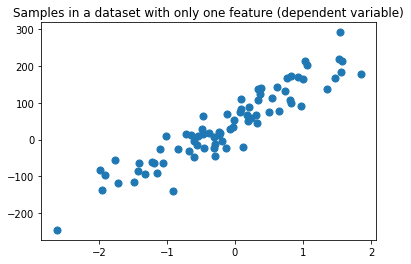

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
plt.figure()
plt.title('Samples in a dataset with only one feature (dependent variable)')
X, y = make_regression(n_samples = 80, n_features=1,
                            n_informative=1, bias = 50,
                            noise = 40, random_state=42)
plt.scatter(X, y, marker= 'o', s=50)
plt.show()

The dataset above has only one dependent variable. In this case, the regression function would be:
$$y = w_1x_1  + c$$

where w1 would be the slope the curve and c would be the offset value.


When we train our model on this data, the coefficients and the bias term will be determined automatically so that the regression function best fits the dataset.

The model algorithm finds the best coefficients for the dataset by optimizing an objective function, which in this case would be the **loss function.** The loss function represents the difference between the predicted outcome values and the real outcome values. 

###Least-Squared Linear Regression

In the Least-Squared linear regression model the coefficients and bias are determined by minimizing the **sum of squared differences (SSR)** for all of the samples in the data. This model is also called **Ordinary Least-Squares**. 
 
$$RSS(\textbf w,c) = \sum\limits_{i=1}^{n} {(\textbf y_i - (\textbf w.\textbf x_i + b))^2}$$

If we interpret the function, it is a function determined by taking the square of the difference between the predicted outcome value and the real outcome value. 

Let's train the Linear Regression model using the fake dataset we previously created and have a look at the calculated coefficients.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

print('feature coefficient (w_1): {}'
     .format(model.coef_))
print('intercept (c): {:.3f}'
     .format(model.intercept_))
print('R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(model.score(X_test, y_test)))

feature coefficient (w_1): [101.41780398]
intercept (c): 53.342
R-squared score (training): 0.891
R-squared score (test): 0.735


Here, R^2 is the coefficient of determination. This term represents the amount of variation in outcome(y) explained by the dependence on features (x variables). Therefore, a larger R^2 indicates a better model performance or a better fit.

When R^2 is equal to one, then RSS is equals to 0. Meaning the predicted outcome values and the real outcome values are exactly the same. We will be using the R^2 term to measure the performance of our model.

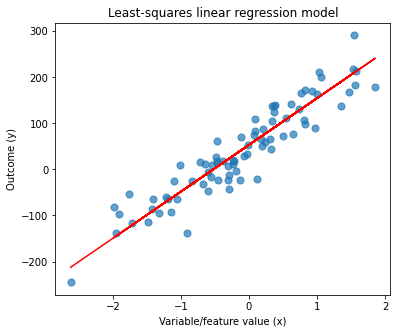

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.7)
plt.plot(X, model.coef_*X + model.intercept_, 'r-')
plt.title('Least-squares linear regression model')
plt.xlabel('Variable/feature value (x)')
plt.ylabel('Outcome (y)')
plt.show()

### Ridge Regression - L2 Regularization

Ridge regression model calculates coefficients and the bias (w and c) using the same criteria in Least-Squared however with an extra term.

$$RSS(\textbf w,c) = \sum\limits_{i=1}^{n} {(\textbf y_i - (\textbf w.\textbf x_i + b))^2} + \boxed {\alpha\sum\limits_{j=1}^{m} {w_j^2}}$$

This term is a penalty to adjust the large variations in the coefficients. The linear prediction formula is still the same but only the way coefficients are calculated differs due to this extra penalty term. This is called **regularization**. It serves to prevent overfitting by restricting the variation of the coefficients which results in a less complex or simpler model.

This extra term is basically the sum of squares of the coefficients. Therefore, when we try to minimize the RSS function, we also minimize the the sum of squares of the coefficients which is called **L2 regularization**. Moreover, the alpha constant serves to control the influence of this regularization. This way, in comparison to the Least-Squared model, we can actually control the complexity of our model with the help of alpha term. The higher alpha term, higher the regularization is, and simpler the model will be.

The accuracy improvement with datasets including one dependent variable (feature) is not significant. However, for datasets with multiple features, regularization can be very effective to reduce model complexity, therefore overfitting and increase model performance on test set.

Let's have a look at its implementation in python.



In [ ]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42)
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)

print('feature coefficients: {}'
     .format(model.coef_))
print('intercept (c): {:.3f}'
     .format(model.intercept_))

feature coefficients: [  50.55155508  -67.72236516  278.3007281   197.62401363   -6.2459735
  -26.22698465 -151.39451804  120.32319558  215.85469359  101.75554294]
intercept (c): 152.514


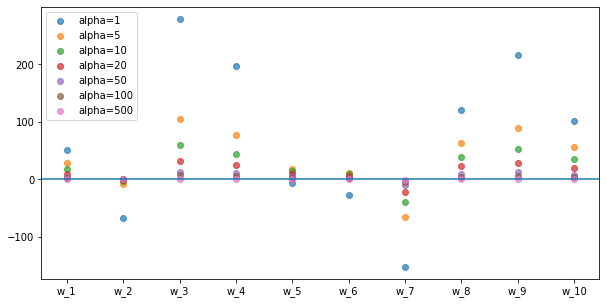

In [ ]:
plt.figure(figsize=(10,5))
alphas = [1,5,10,20,50,100,500]
features = ['w_'+str(i+1) for i,_ in enumerate(model.coef_)]
for alpha in alphas:
  model = Ridge(alpha=alpha).fit(X_train,y_train)
  plt.scatter(features,model.coef_, alpha=0.7,label=('alpha='+str(alpha)))

plt.axhline(0)
plt.xticks(features)
plt.legend(loc='upper left')
plt.show()

Normalization can be applied unfairly to the features when they have different scales (when one feature has values around 0-1 and the other has from 100-1000). This can cause inaccuracies in our model when we apply regularization. In this case, feature scaling comes to our help to normalize all the values in the dataset, so that we can get rid of the scale differences. We will look in to feature scaling in another section...

### Lasso Regression - L1 Regularization

Lasso regression is also a regularized linear regression model. In comparison to Ridge regression, it uses L1 regularization as the penalty term while calculating the coefficients.

Let's have a look at how the RSS function looks like with the penalty term for L1 regularization. 


$$RSS(\textbf w,c) = \sum\limits_{i=1}^{n} {(\textbf y_i - (\textbf w.\textbf x_i + b))^2} + \boxed {\alpha\sum\limits_{j=1}^{m} {|w_j|}}$$

The penalty term for L1 regularization is the sum of absolute values of the coefficients. Therefore, when the algorithm tries to minimize RSS, it enforces the regularization by minimizing the sum of absolute values of the coefficients.

This results in coefficients of the least effective paramaters to be 0 which is kind of like feature selection. Therefore, it is most effectively used for datasets where there a few features with a more dominant effect compared to others. This results in eliminating features which have a small effect by setting their coefficients to 0.

Alpha term is again used to control the amount of regularization. 

In [ ]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train, y_train)

print('feature coefficients: {}'
     .format(model.coef_))
print('intercept (c): {:.3f}'
     .format(model.intercept_))

feature coefficients: [  0.          -0.         398.38436775  46.17884277   0.
   0.          -0.           0.         238.18740159   0.        ]
intercept (c): 152.944


After finding the coefficients of the dominant features, we can go ahead and list their labels.

In [ ]:
import numpy as np
data = datasets.load_diabetes()
np.take(data.feature_names,np.nonzero(model.coef_))

array([['bmi', 'bp', 's5']], dtype='<U3')

In [ ]:
alphas = [0.1,0.5,1,2,5,10]
for alpha in alphas:
  model = Lasso(alpha=alpha).fit(X_train,y_train)
  print('feature coefficients for alpha={}: \n{}'.format(alpha,model.coef_))
  print('R-squared score (training): {:.3f}'
     .format(model.score(X_train, y_train)))
  print('R-squared score (test): {:.3f}\n'
     .format(model.score(X_test, y_test)))

feature coefficients for alpha=0.1: 
[   0.         -151.41550421  540.85933829  337.22472854  -85.19030645
   -0.         -262.90345036    0.          418.24822392    9.92430726]
R-squared score (training): 0.508
R-squared score (test): 0.502

feature coefficients for alpha=0.5: 
[   0.           -0.          492.28522027  187.79307581   -0.
   -0.         -107.63391392    0.          322.2269439     0.        ]
R-squared score (training): 0.451
R-squared score (test): 0.477

feature coefficients for alpha=1: 
[  0.          -0.         398.38436775  46.17884277   0.
   0.          -0.           0.         238.18740159   0.        ]
R-squared score (training): 0.347
R-squared score (test): 0.379

feature coefficients for alpha=2: 
[ 0.          0.         75.24915126  0.          0.          0.
 -0.          0.          0.          0.        ]
R-squared score (training): 0.052
R-squared score (test): 0.041

feature coefficients for alpha=5: 
[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
R

#### Ridge or Lasso?

To sum up, it makes sense to use the Ridge regression model there are many small to medium effective features. If there are only a few dominantly effective features, use the Lasso regression model.

### Polynomial Regression

Linear regression performs well on the assumption that the relationship between the independent variables (features) and the dependent variable(outcome) is linear. If the distrubtion of the data is more complex and does not show a linear behaviour, can we still use linear models to represent such datasets? This is where polynomial regression comes in very useful.

To capture this complex behaviour, we can add higher order terms to represent the features in the data. Transforming the linear model with one feature:

$$y = w_1x  + c \rightarrow \boxed{y=w_1x + w_2x^2 + c} $$

Since the coefficients are related to features linearly, this is still a liner model. However, it contains quadratic terms and the curve fitted is a polynomial curve.

Let's continue with an example for Polynomial regression. To convert the features to higher order terms, we can use the PolynomialFeatures class from scikit-learn. Then we can use the Linear regression model from before to train the model.

But before, let us create a dataset which could be a good fit for a 2nd degree function. For that we will use numpy to create random X points and plug them into a representative function.

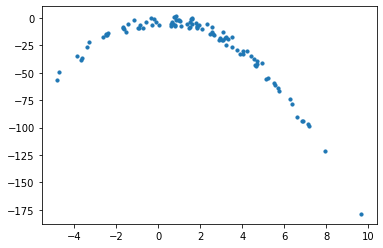

In [ ]:
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2)  + np.random.normal(-3, 3, 100)

plt.scatter(X, y, s=10)
plt.show()

We can reshape the arrays we created so that we can feed them in to the model. First, we will train a LinearRegression model to see how it fits to this data.

feature coefficients: 
[[-6.36572661]]
R-squared score (training): 0.397


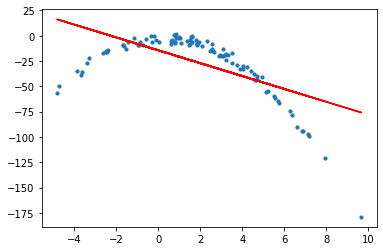

In [ ]:
X = X[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()
model.fit(X,y)
print('feature coefficients: \n{}'.format(model.coef_))
print('R-squared score (training): {:.3f}'
    .format(model.score(X, y)))

plt.plot(X, model.coef_*X + model.intercept_, 'r-')
plt.scatter(X,y, s=10)
plt.show()

As expected, Linear Regression model does not provide a very good fit with the normal features for a dataset of this behaviour. Now, we can create 2nd order Polynomial features using the PolynomialFeatures class from sk-learn library. Then, use these new 2nd order features to train the same linear regression model.

feature coefficients: 
[[ 0.          0.96597113 -2.02225052]]
R-squared score (training): 0.990


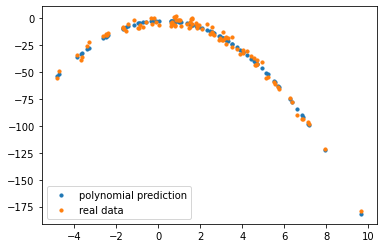

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features= PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly,y)
print('feature coefficients: \n{}'.format(model.coef_))
print('R-squared score (training): {:.3f}'
    .format(model.score(X_poly, y)))
plt.scatter(X,model.predict(X_poly),s=10,label="polynomial prediction")
plt.scatter(X,y,s=10,label="real data")
plt.legend(loc='lower left')
plt.show()



This time, we were able to obtain a very good fit using the same linear regression model but with 2nd order features obtained from the PolynomialFeatures class. This is a perfect example to show how Polynomial Linear Regression can be used to obtain better fits with data which do not have a linear relationship between the features and the outcome value.